In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("Advertising.csv",index_col=0)
data

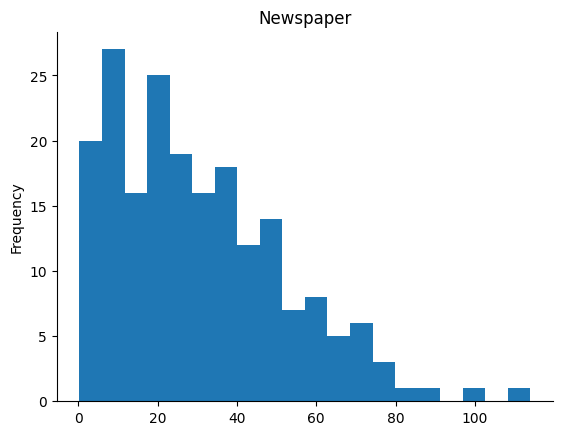

In [8]:
# @title Newspaper

from matplotlib import pyplot as plt
data['Newspaper'].plot(kind='hist', bins=20, title='Newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

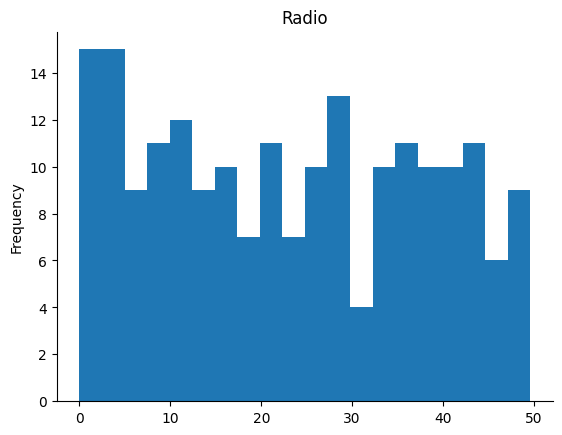

In [7]:
# @title Radio

from matplotlib import pyplot as plt
data['Radio'].plot(kind='hist', bins=20, title='Radio')
plt.gca().spines[['top', 'right',]].set_visible(False)

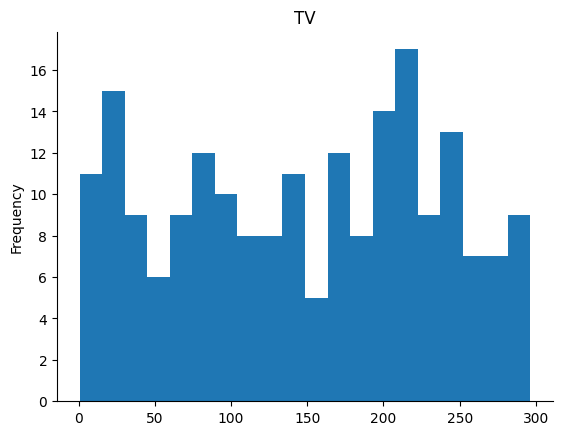

In [6]:
# @title TV

from matplotlib import pyplot as plt
data['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

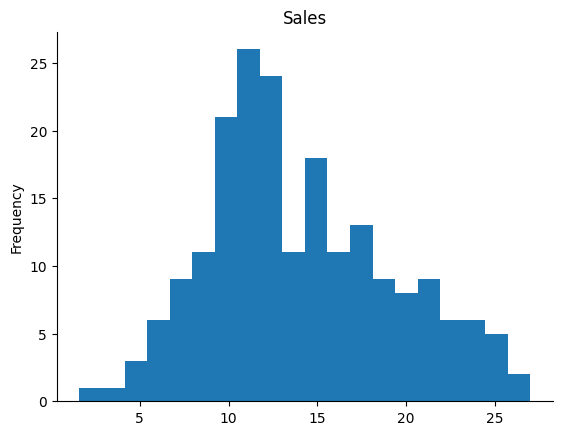

In [5]:
# @title Sales

from matplotlib import pyplot as plt
data['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


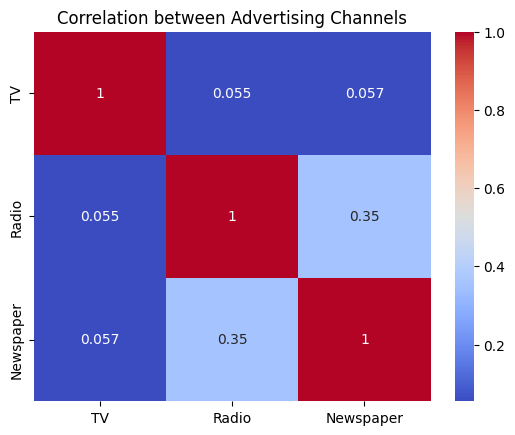

In [10]:
# @title Correlation between Advertising Channels

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data[['TV', 'Radio', 'Newspaper']].corr(), annot=True, cmap='coolwarm')
_ = plt.title('Correlation between Advertising Channels')

In [11]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [12]:
data.shape

(200, 4)

In [13]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

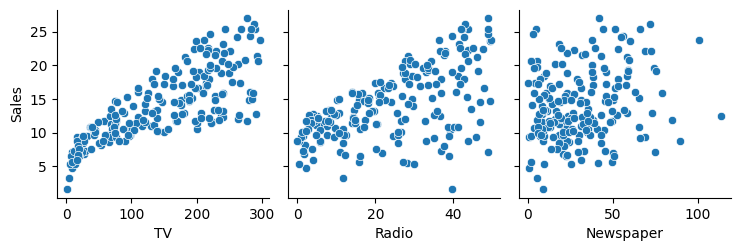

In [14]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

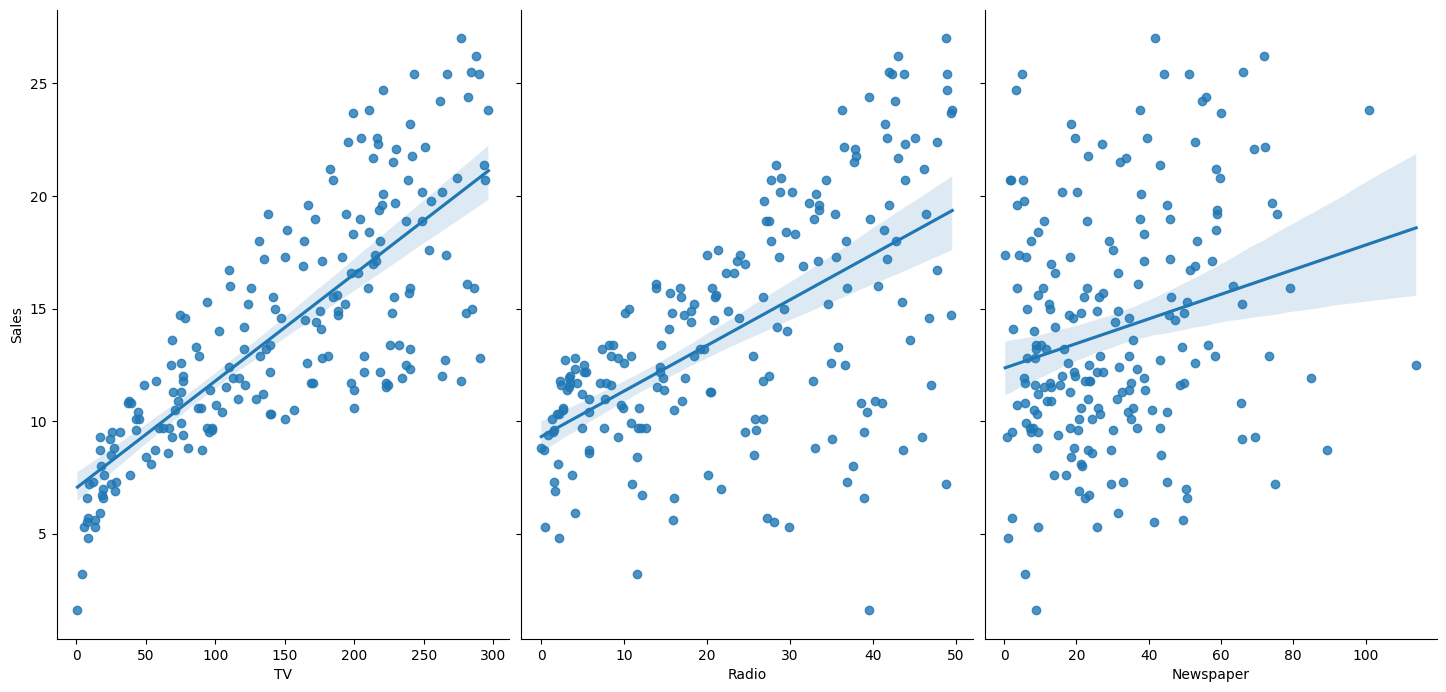

In [15]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=7,aspect=0.7,kind='reg')

In [16]:
feature_cols = ['TV','Radio','Newspaper']
X = np.array(data[feature_cols])
y = np.array(data['Sales'])

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [21]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
print(linreg.score(X_test,y_test))

0.8927605914615385


In [22]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.4113417558581578


In [24]:
feature_cols = ['TV','Radio']
X = np.array(data[feature_cols])
y = np.array(data['Sales'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
print(linreg.score(X_test,y_test))

0.8947344950027067


In [25]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.3982924890777746


In [26]:
test_1 = np.array([[230.1,37.8]])
print(linreg.predict(test_1))

[20.53654212]


In [27]:
test_2 = np.array([[232.1,8.6]])
print(linreg.predict(test_2))

[15.37409216]
